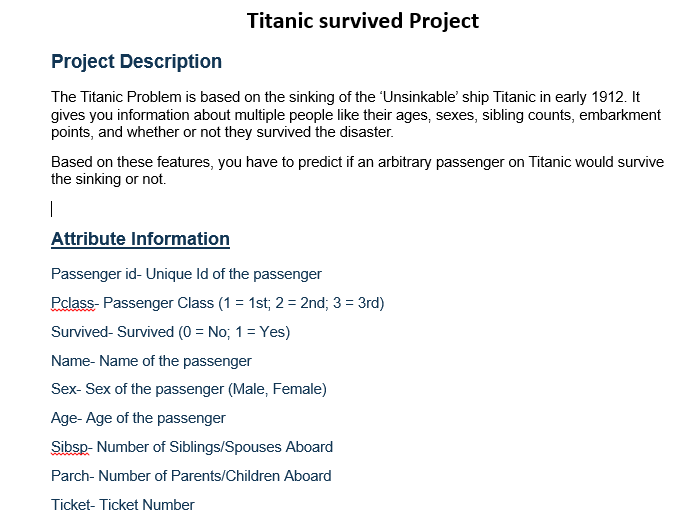
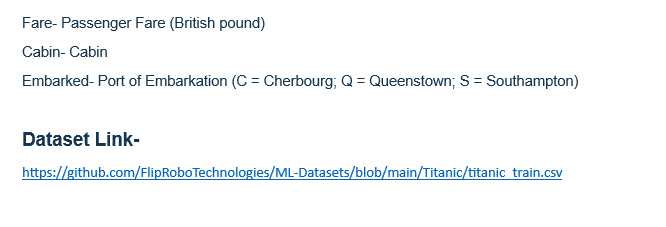

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy import stats # for zscore to find outliars 
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix


In [28]:
df=pd.read_csv(r'https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Titanic/titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Survived
0    549
1    342
Name: count, dtype: int64


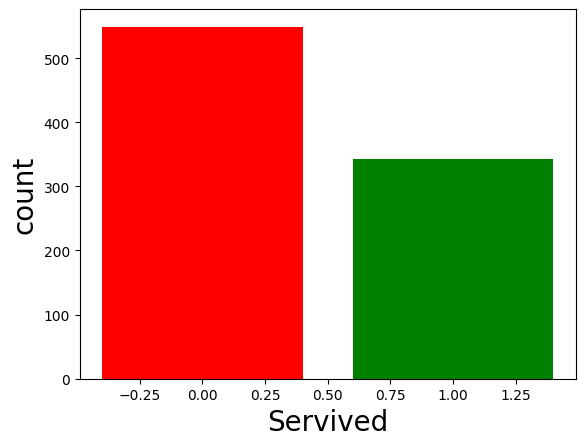

In [33]:
servived=df['Survived'].value_counts()
print(servived)
plt.bar(servived.index,servived.values,color=['r','g'])
plt.xlabel('Servived',fontsize=20)
plt.ylabel('count',fontsize=20)
plt.show()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


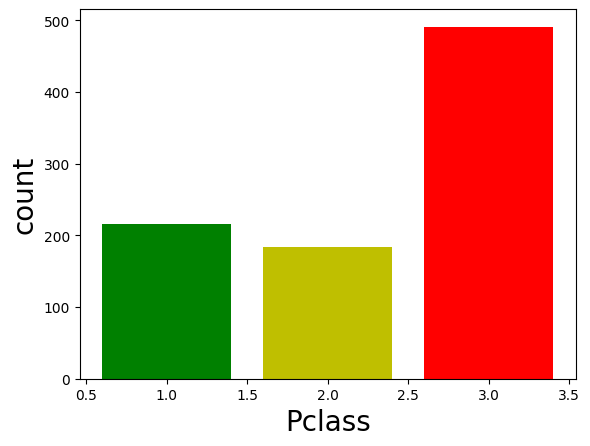

In [31]:
Pclasses=df['Pclass'].value_counts()
print(Pclasses)
plt.bar(Pclasses.index,Pclasses.values,color=['r','g','y'])
plt.xlabel('Pclass',fontsize=20)
plt.ylabel('count',fontsize=20)
plt.show()

Sex
male      577
female    314
Name: count, dtype: int64


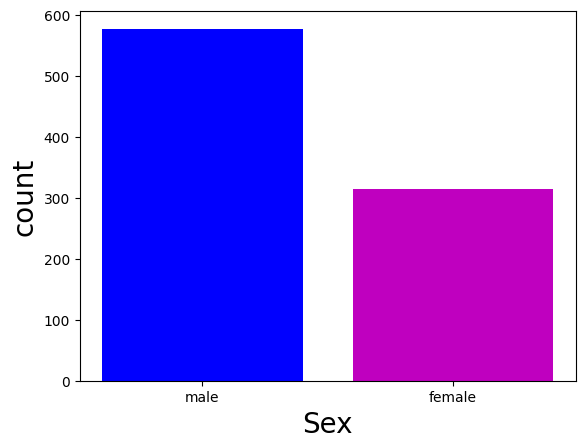

In [40]:
Sex_count=df['Sex'].value_counts()
print(Sex_count)
plt.bar(Sex_count.index,Sex_count.values,color=['b','m'])
plt.xlabel('Sex',fontsize=20)
plt.ylabel('count',fontsize=20)
plt.show()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64


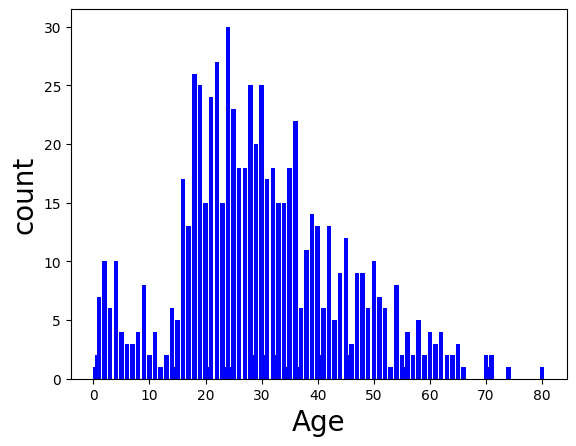

In [39]:
Age_count=df['Age'].value_counts()
print(Age_count)
plt.bar(Age_count.index,Age_count.values,color=['b'])
plt.xlabel('Age',fontsize=20)
plt.ylabel('count',fontsize=20)
plt.show()

In [ ]:
# we hav mostly age under 20 to 30


In [12]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# we have null values in Age, cabin
# Name, Sex, ticket , cabin , Embarked are object data


In [42]:
df.isna().sum() # how many N/A are there?

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [29]:
df=df.drop('Cabin',axis=1) # sisnce Cabun has lots of N/A we have to remove it
print(df.head())
print(df.shape)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S  
(891, 11)


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [56]:
print(df['Age'].dtype)
print(df['Age'].isna().sum())

float64
177


In [30]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [31]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [67]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


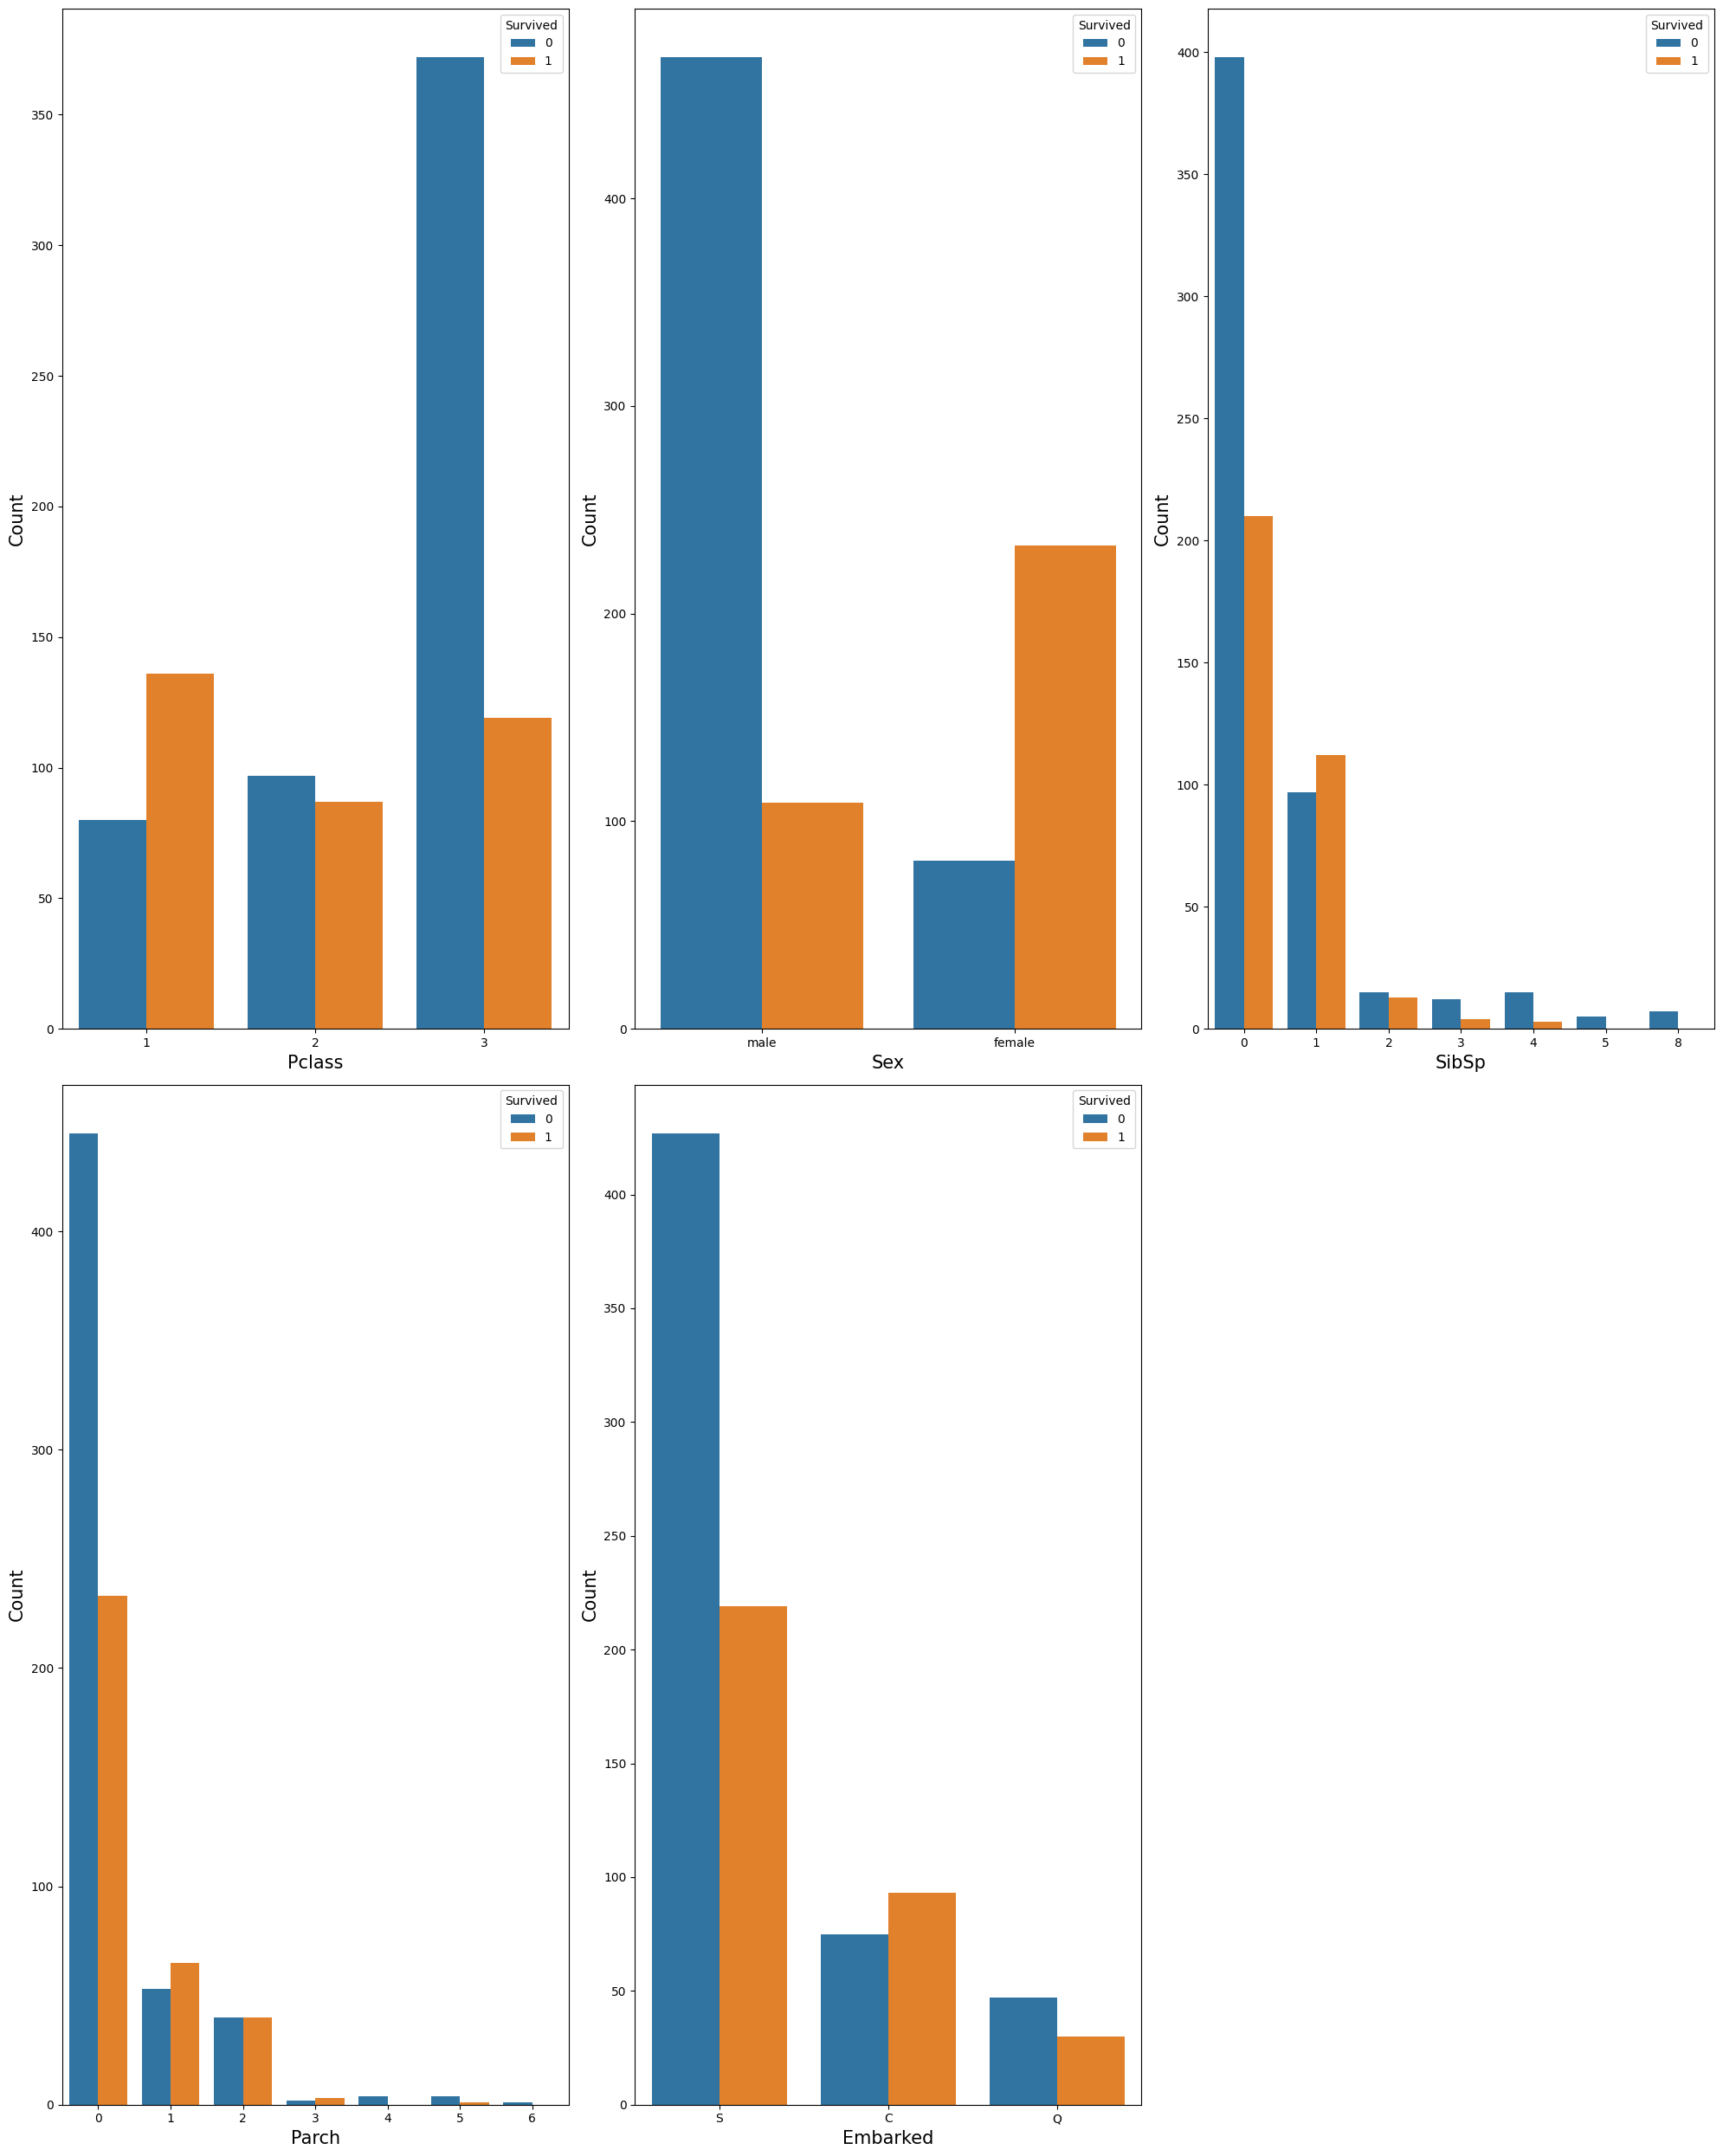

In [78]:
plt.figure(figsize=(20,25),facecolor='white')
p=1
d=['Pclass','Sex','SibSp','Parch','Embarked']
for i in d:
    
    if p<=11:
        axs=plt.subplot(2,3,p)
        sns.countplot(x=i,hue='Survived',data=df,ax=axs)
        plt.xlabel(i,fontsize=15)
        plt.ylabel('Count',fontsize=15)
    p+=1
plt.tight_layout()
plt.show()
    

In [32]:
# droping Name
df=df.drop('Name',axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S


In [33]:
# droping 
df=df.drop('Ticket',axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [34]:
# droping 
df=df.drop('PassengerId',axis=1)
df.head()

AttributeError: 'DataFrame' object has no attribute 'headd'

In [35]:
# Encoding catogorical column using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
df
    

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1.0,22.000000,1,0,7.2500,2.0
1,1,1,0.0,38.000000,1,0,71.2833,0.0
2,1,3,0.0,26.000000,0,0,7.9250,2.0
3,1,1,0.0,35.000000,1,0,53.1000,2.0
4,0,3,1.0,35.000000,0,0,8.0500,2.0
...,...,...,...,...,...,...,...,...
886,0,2,1.0,27.000000,0,0,13.0000,2.0
887,1,1,0.0,19.000000,0,0,30.0000,2.0
888,0,3,0.0,29.699118,1,2,23.4500,2.0
889,1,1,1.0,26.000000,0,0,30.0000,0.0


In [21]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.357438,0.272415,2.765835,0.999898
std,0.486592,0.836071,0.477990,13.002015,0.541399,0.494092,1.072486,0.487649
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,1.992505,1.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,2.435929,1.259921
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,3.141381,1.259921
max,1.000000,3.000000,1.000000,80.000000,2.000000,1.817121,8.001714,1.259921


In [36]:
df.skew() # those <0.5 & < -0.5 are skewed , those columns which were categorical column can be ignored

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked   -1.264823
dtype: float64

In [37]:
#Removing the sewness using cuberoot method
df['SibSp']=np.cbrt(df['SibSp'])

In [38]:
#Removing the sewness using cuberoot method
df['Parch']=np.cbrt(df['Parch'])

In [39]:
#Removing the sewness using cuberoot method
df['Fare']=np.cbrt(df['Fare'])

In [40]:
#Removing the sewness using cuberoot method
df['Embarked']=np.cbrt(df['Embarked'])

In [41]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.434488
SibSp       1.033059
Parch       1.348334
Fare        1.230382
Embarked   -1.520662
dtype: float64

In [42]:
# Checking the corelation between feature and target

cor=df.corr()
cor

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.069809,0.071084,0.132108,0.322398,-0.170667
Pclass,-0.338481,1.000000,0.131900,-0.331339,-0.023812,-0.014490,-0.656224,0.212893
Sex,-0.543351,0.131900,1.000000,0.084153,-0.187753,-0.255950,-0.251434,0.094886
Age,-0.069809,-0.331339,0.084153,1.000000,-0.197664,-0.249280,0.105195,-0.030306
SibSp,0.071084,-0.023812,-0.187753,-0.197664,1.000000,0.465046,0.349549,0.004337
Parch,0.132108,-0.014490,-0.255950,-0.249280,0.465046,1.000000,0.342465,-0.004927
Fare,0.322398,-0.656224,-0.251434,0.105195,0.349549,0.342465,1.000000,-0.258035
Embarked,-0.170667,0.212893,0.094886,-0.030306,0.004337,-0.004927,-0.258035,1.000000


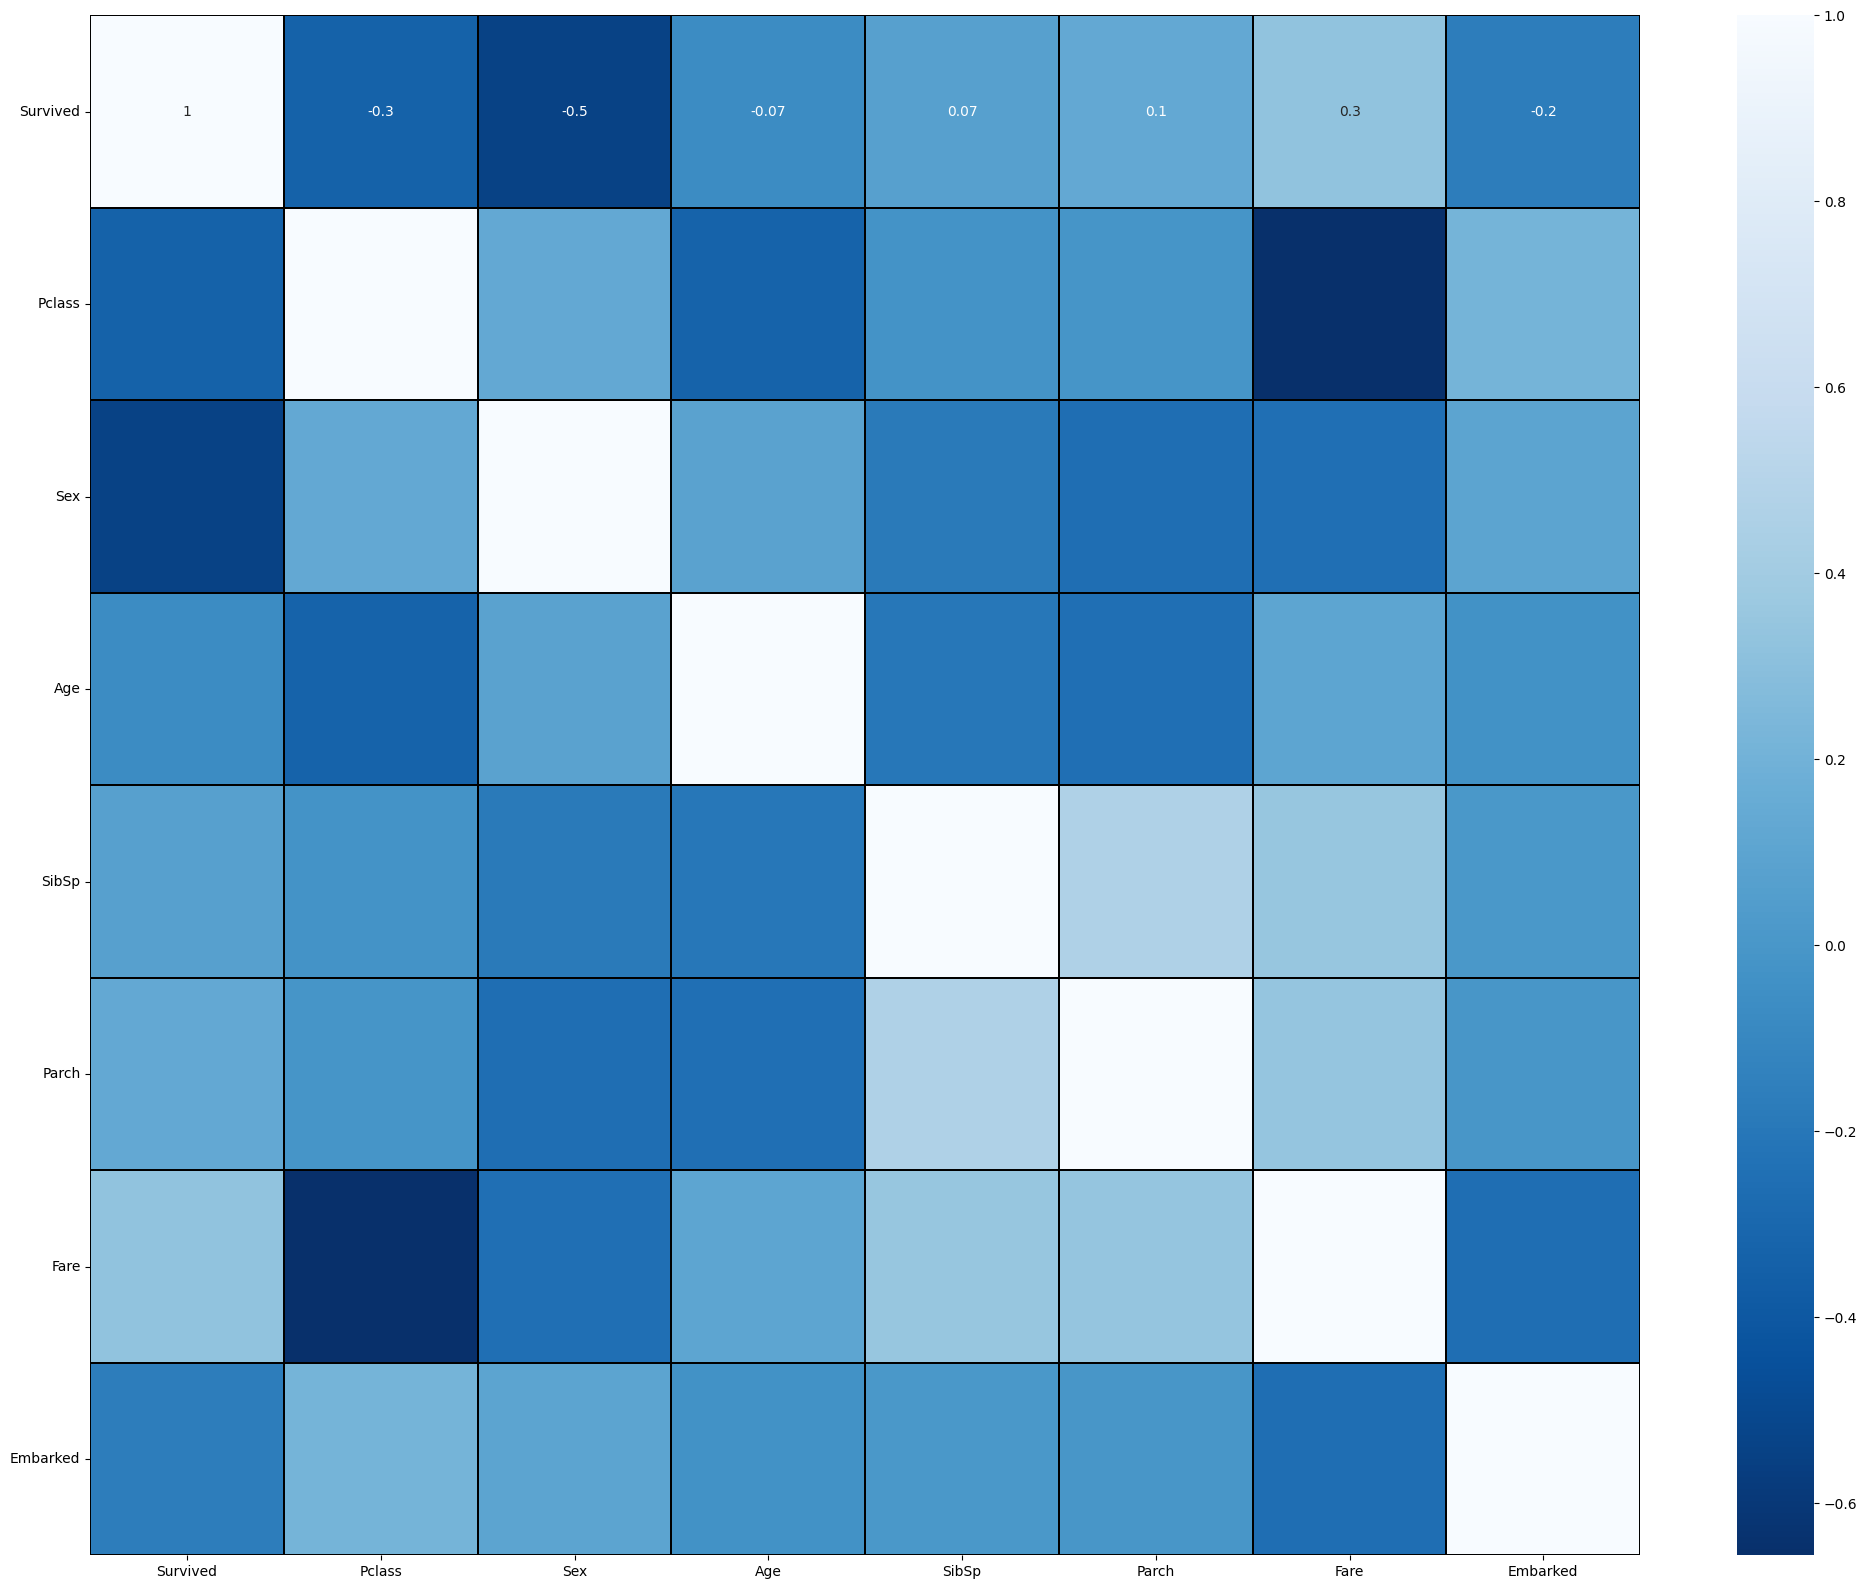

In [43]:
#Visualization the correlation matrix by plotting the window 
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),linewidths=0.1,fmt='.1g',linecolor='Black', annot= True,cmap="Blues_r")
plt.yticks(rotation =0);
plt.show()

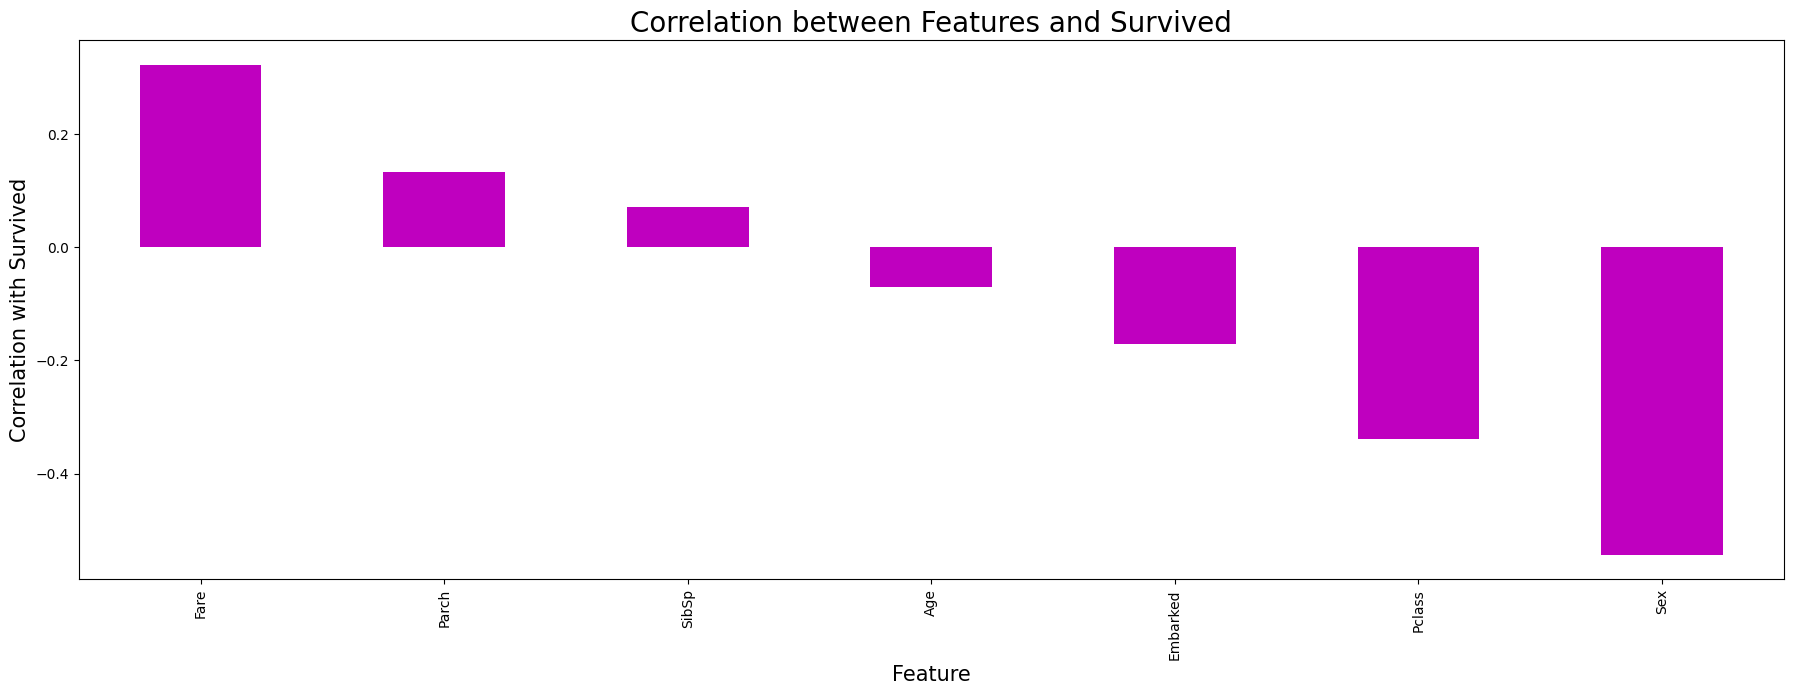

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(22, 7))

# Sort correlation values of 'Churn' with other features, exclude 'Churn', and plot as a bar chart
df.corr()['Survived'].sort_values(ascending=False).drop(['Survived']).plot(kind='bar', color='m')

plt.xlabel('Feature', fontsize=15)  # Set label for x-axis
plt.ylabel('Correlation with Survived', fontsize=15)  # Set label for y-axis
plt.title('Correlation between Features and Survived', fontsize=20)  # Set plot title

plt.show()  # Display the bar plot


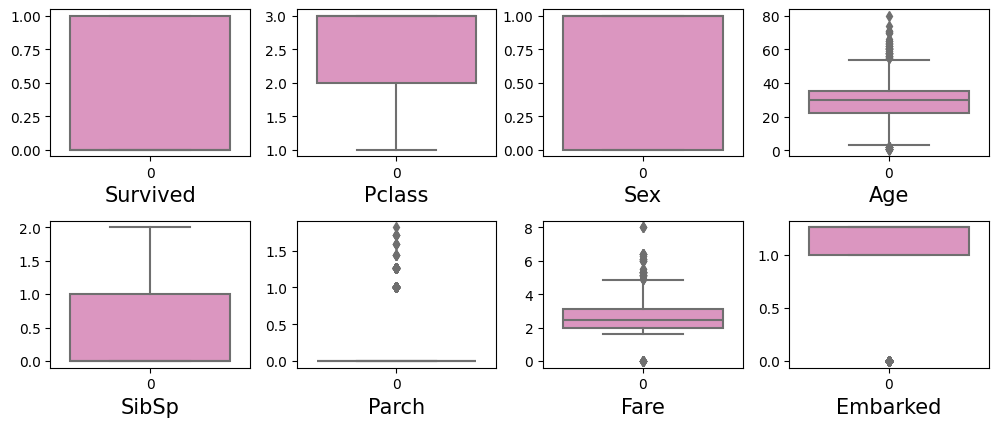

In [45]:
# lets check the outliars
plt.figure(figsize=(10,6),facecolor='white')
plotnumber=1

for col in df.columns:
    if plotnumber<=9:
        ax=plt.subplot(3,4,plotnumber)
        sns.boxplot(df[col],palette='Set2_r')
        plt.xlabel(col, fontsize=15)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [46]:
# Seprating x & Y

x=df.drop('Survived',axis=1)
y=df['Survived']

In [51]:
# Feature scaling using standard scaralization

from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()

X=pd.DataFrame(Scaler.fit_transform(x),columns=x.columns)
X
# now we have scaled the features by standard scaler to remove the biasness in feature , we do not scaled Target in any case

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.827377,0.737695,-0.592481,1.187523,-0.551654,-0.774708,0.533518
1,-1.566107,-1.355574,0.638789,1.187523,-0.551654,1.287903,-2.051599
2,0.827377,-1.355574,-0.284663,-0.660582,-0.551654,-0.720325,0.533518
3,-1.566107,-1.355574,0.407926,1.187523,-0.551654,0.926230,0.533518
4,0.827377,0.737695,0.407926,-0.660582,-0.551654,-0.710596,0.533518
...,...,...,...,...,...,...,...
886,-0.369365,0.737695,-0.207709,-0.660582,-0.551654,-0.386703,0.533518
887,-1.566107,-1.355574,-0.823344,-0.660582,-0.551654,0.318502,0.533518
888,0.827377,-1.355574,0.000000,1.187523,1.999751,0.089990,0.533518
889,-1.566107,0.737695,-0.284663,-0.660582,-0.551654,0.318502,-2.051599


In [52]:
# Now checking Variance inflation factor (VIF) in each scaled columns i.e x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['VIF_Values']=[variance_inflation_factor (X.values,i) for i in range (len(X.columns))]
vif['Features']=X.columns
vif



,VIF_Values,Features
0,2.158362,Pclass
1,1.115693,Sex
2,1.232997,Age
3,1.425909,SibSp
4,1.484039,Parch
5,2.507018,Fare
6,1.091906,Embarked


The Variance Inflation Factor (VIF) measures how much the variance of a regression coefficient is inflated due to multicollinearity with other predictors. Generally, a VIF value greater than 10 indicates high multicollinearity, which can be problematic in regression analysis. 

1. Low Multicollinearity: All VIF values are well below the threshold of 10, indicating low multicollinearity among the predictors in your dataset. This suggests that the predictors are not highly correlated with each other, which is a positive aspect for the stability and reliability of your regression model.

2. No Immediate Concerns: Since none of the VIF values are close to or above 10, there are no immediate concerns regarding multicollinearity. You can proceed with the regression analysis without needing to address multicollinearity issues.

3. Higher VIF Values: Although the VIF values for 'Pclass' (2.16) and 'Fare' (2.51) are higher than the others, they are still well below the critical threshold. However, if your dataset grows or if you add more predictors, you might want to keep an eye on these features to ensure they don't start to exhibit higher multicollinearity.

Overall, your dataset appears to be in good shape regarding multicollinearity, and you can confidently use these features in your regression model.

In [53]:
y.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [ ]:
# data can be seems balanced so no oversampling treatment required 

In [ ]:
# Train Test split & Model building 


In [54]:
# Finding the best random state

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxAccu=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    Pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,Pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i

print("Best Accuracy is : ",maxAccu,"at random state : ",maxRS)

Best Accuracy is :  0.8770949720670391 at random state :  74


In [55]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=maxRS)

In [56]:
# Classification Algorithm
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier , BaggingClassifier
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score, roc_curve
from sklearn.model_selection import cross_val_score

In [57]:
# Random Forest classifier 

# Checking accuracy for RandoForestClassifier 

RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
PredRFC=RFC.predict(x_test)
print(accuracy_score(y_test,PredRFC))
print(confusion_matrix(y_test,PredRFC))
print(classification_report(y_test,PredRFC))


0.8547486033519553
[[98 14]
 [12 55]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       112
           1       0.80      0.82      0.81        67

    accuracy                           0.85       179
   macro avg       0.84      0.85      0.85       179
weighted avg       0.86      0.85      0.86       179



In [58]:
# Logistic Regresion

LR=LogisticRegression()
LR.fit(x_train,y_train)
PredLR=LR.predict(x_test)
print(accuracy_score(y_test,PredLR))
print(confusion_matrix(y_test,PredLR))
print(classification_report(y_test,PredLR))


0.8379888268156425
[[97 15]
 [14 53]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       112
           1       0.78      0.79      0.79        67

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



In [59]:
# Extra Tree Classfier 

ET=LogisticRegression()
ET.fit(x_train,y_train)
PredET=RFC.predict(x_test)
print(accuracy_score(y_test,PredET))
print(confusion_matrix(y_test,PredET))
print(classification_report(y_test,PredET))



0.8547486033519553
[[98 14]
 [12 55]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       112
           1       0.80      0.82      0.81        67

    accuracy                           0.85       179
   macro avg       0.84      0.85      0.85       179
weighted avg       0.86      0.85      0.86       179



In [60]:
# Cross Vaidation method

from sklearn.model_selection import cross_val_score


In [62]:
# checking CV score for Randm Forest

score=cross_val_score(RFC,X,y)
print(score)
print(score.mean())
print( "Difference between Accuracy score and cross validation score is : ", accuracy_score(y_test,PredRFC)-score.mean())

[0.77653631 0.81460674 0.86516854 0.76966292 0.84269663]
0.8137342288619672
Difference between Accuracy score and cross validation score is :  0.041014374489988126


In [63]:
# checking CV score for Logistic Regression

score=cross_val_score(LR,X,y)
print(score)
print(score.mean())
print( "Difference between Accuracy score and cross validation score is : ", accuracy_score(y_test,PredLR)-score.mean())

[0.76536313 0.78651685 0.78651685 0.76966292 0.82022472]
0.7856568953612453
Difference between Accuracy score and cross validation score is :  0.052331931454397185


In [64]:
# checking CV score for Extra Tree

score=cross_val_score(ET,X,y)
print(score)
print(score.mean())
print( "Difference between Accuracy score and cross validation score is : ", accuracy_score(y_test,PredET)-score.mean())

[0.76536313 0.78651685 0.78651685 0.76966292 0.82022472]
0.7856568953612453
Difference between Accuracy score and cross validation score is :  0.06909170799071007


Random Forest classifier is the best model for this problem as diffrence between the accuracy score and 
cross validation score are least

#### Hyperparameter tuning

In [65]:
from sklearn.model_selection import GridSearchCV

parameters={
    'criterion':['gini','entropy'],
    'random_state':[10,50,1000],
    'max_depth': [0,10,20],
    'n_jobs': [-2,-1,1],
    'n_estimators':[50,100,200,300]
}
parameters

{'criterion': ['gini', 'entropy'],
 'random_state': [10, 50, 1000],
 'max_depth': [0, 10, 20],
 'n_jobs': [-2, -1, 1],
 'n_estimators': [50, 100, 200, 300]}

In [68]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)
GCV

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [69]:
GCV.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [70]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'n_estimators': 200,
 'n_jobs': -2,
 'random_state': 10}

In [71]:
Final_model=RandomForestClassifier(criterion='entropy',random_state=10,max_depth=10,n_jobs=-2,n_estimators=200)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

90.5027932960894


In [73]:
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import roc_curve

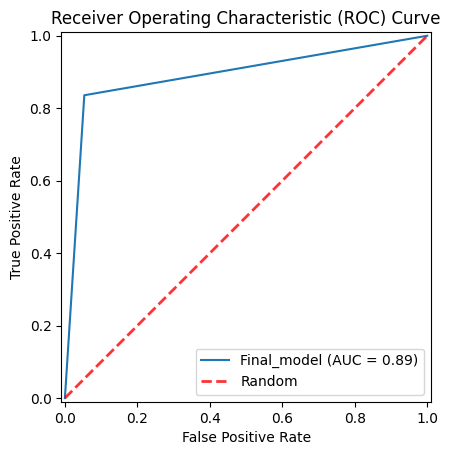

In [74]:
from sklearn import metrics
import matplotlib.pyplot as plt

# Assuming `pred` is your model's predictions and `y_test` is the actual labels
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)

# Calculate the AUC (Area Under Curve) for ROC
roc_auc = metrics.auc(fpr, tpr)

# Create an ROC Curve plot using RocCurveDisplay
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="Final_model")

# Plot the ROC Curve
display.plot()

# Add the diagonal line (representing random guess) to the plot
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random', alpha=.8)

# Set plot labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Show the plot
plt.show()


### Saving Model

In [76]:
# Lets load the saved model and get the prediction 
import joblib
joblib.dump(Final_model,'Titanic survived project,pkl')

model=joblib.load('Titanic survived project,pkl')

# prediction

Prediction=model.predict(x_test)

Prediction
    


array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0], dtype=int64)

In [77]:
a=np.array(y_test)
df=pd.DataFrame()
df["Predicted"]=Prediction
df['Original']=a
df

,Predicted,Original
0,0,0
1,1,1
2,0,0
3,0,1
4,0,0
...,...,...
174,0,0
175,0,0
176,0,0
177,1,1
